In [5]:
def jac_dis(da,db):
    n=len(da)
    m=len(db)
    if n==m and n==0:
        return(0)
    inter=0
    union=0
    i=0
    j=0
    while i<n and j<m:
        if da[i]==db[j]:
            inter=inter+1
            union=union+1
            i=i+1
            j=j+1
        elif da[i]<db[j]:
            union=union+1
            i=i+1
        elif db[j]<da[i] :
            union=union+1
            j=j+1
    if i==n:
        while j<m:
            union=union+1
            j=j+1
    else:
        while i<n:
            union=union+1
            i=i+1
    return(1-(inter/union))
            
            
            

In [8]:
import random

In [9]:
def merge(arr1, arr2):
    merged_array = []
    i = 0  
    j = 0  
    while i < len(arr1) and j < len(arr2):
        if arr1[i]==arr2[j]:
            merged_array.append(arr1[i])
            i+=1
            j+=1
        elif arr1[i] < arr2[j]:
            merged_array.append(arr1[i])
            i += 1
        else:
            merged_array.append(arr2[j])
            j += 1
    while i < len(arr1):
        merged_array.append(arr1[i])
        i += 1
    while j < len(arr2):
        merged_array.append(arr2[j])
        j += 1
    
    return merged_array


In [10]:
def find_centroid(l):
    n=len(l)
    L=[]
    if n==1:
        L=d[l[0]]
    if n>=2:
        L=merge(d[l[0]],d[l[1]])
        for i in range(2,n):
            L=merge(L,d[l[i]])
    return(L)   

In [54]:
def clustering(data,n,k): #n is the number of documents and k is the number of clusters.
    
    r = [random.randint(1,n) for i in range(k)]
    centroids=[data[i] for i in r]
    p=0
    while True:
        di={}
        for i in range(1,k+1):
            di[i]=[]
        for i in range(1,n+1):
            min=1.1
            min_point=-1
            for j in range(k):
                if jac_dis(data[i],centroids[j])<min:
                    min=jac_dis(data[i],centroids[j])
                    min_point=j+1
            di[min_point].append(i)
        new_centroids=[]
        for i in di:
            new_centroids.append(find_centroid(di[i]))
        centroid_distance=0
        for i in range(k):
            centroid_distance+=jac_dis(centroids[i],new_centroids[i])
        if centroid_distance<1 or p==100:
            centroids=new_centroids
            break
        p=p+1
        centroids=new_centroids
    inertia=0
    for i in range(1,k+1):
        center=centroids[i-1]
        for j in di[i]:
            inertia+=(jac_dis(center,data[j]))**2
    return(inertia)
        
            
        
    
    

In [40]:
import csv
def file_convert(file_path):
    data = []
    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            i=row[0].split()
            k=[]
            for j in i:
                k.append(int(j))
            data.append(k)
    d={}
    n=len(data)
    for i in range(n):
        if data[i][0] in d:
            d[data[i][0]].append(data[i][1])
        else:
            d[data[i][0]]=[]
            d[data[i][0]].append(data[i][1])
    return(d)

Document collection 1) ENRON DATA

In [60]:
f1_path="C:\\Users\\prana\\OneDrive\\Desktop\\f1.enron.txt"

In [61]:
d=file_convert(f1_path)

In [62]:
l=[]
for k in range(1,10):
    l.append(clustering(d,1000,k))
    print(l)
    
    

[987.305465040223]
[987.305465040223, 982.311909876514]
[987.305465040223, 982.311909876514, 979.5764052487535]
[987.305465040223, 982.311909876514, 979.5764052487535, 977.1740523669114]
[987.305465040223, 982.311909876514, 979.5764052487535, 977.1740523669114, 980.056674880243]
[987.305465040223, 982.311909876514, 979.5764052487535, 977.1740523669114, 980.056674880243, 966.2990463677746]
[987.305465040223, 982.311909876514, 979.5764052487535, 977.1740523669114, 980.056674880243, 966.2990463677746, 961.9905441929944]
[987.305465040223, 982.311909876514, 979.5764052487535, 977.1740523669114, 980.056674880243, 966.2990463677746, 961.9905441929944, 960.8232067838607]
[987.305465040223, 982.311909876514, 979.5764052487535, 977.1740523669114, 980.056674880243, 966.2990463677746, 961.9905441929944, 960.8232067838607, 954.477919693679]


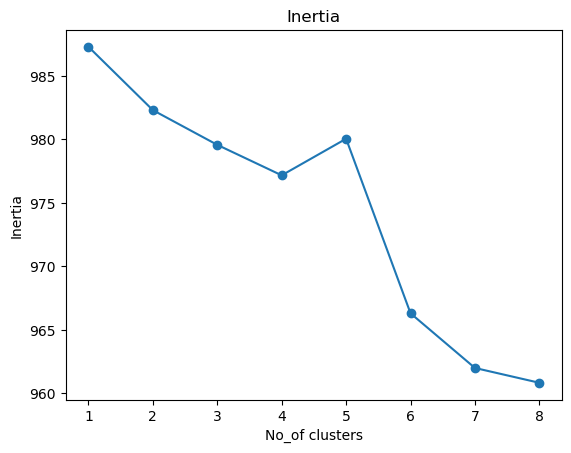

In [68]:
y=[987.305465040223, 982.311909876514, 979.5764052487535, 977.1740523669114, 980.056674880243, 966.2990463677746, 961.9905441929944, 960.8232067838607]
x=[i for i in range(1,9)]

import matplotlib.pyplot as plt
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('No_of clusters')
plt.ylabel('Inertia')
plt.title('Inertia')
plt.show()

In [ ]:
Document collection 2) KOS

In [41]:
f2_path="C:\\Users\\prana\\OneDrive\\Desktop\\docword.kos.txt"

In [42]:
d=file_convert(f2_path)

In [64]:
l=[]
for k in range(1,10):
    l.append(clustering(d,1000,k))
    print(l)

[987.305465040223]
[987.305465040223, 982.5897057455562]
[987.305465040223, 982.5897057455562, 983.8883659453788]
[987.305465040223, 982.5897057455562, 983.8883659453788, 982.3894135463253]
[987.305465040223, 982.5897057455562, 983.8883659453788, 982.3894135463253, 969.2167120849136]
[987.305465040223, 982.5897057455562, 983.8883659453788, 982.3894135463253, 969.2167120849136, 964.4995530235904]
[987.305465040223, 982.5897057455562, 983.8883659453788, 982.3894135463253, 969.2167120849136, 964.4995530235904, 966.7232176410284]
[987.305465040223, 982.5897057455562, 983.8883659453788, 982.3894135463253, 969.2167120849136, 964.4995530235904, 966.7232176410284, 960.9651451353798]
[987.305465040223, 982.5897057455562, 983.8883659453788, 982.3894135463253, 969.2167120849136, 964.4995530235904, 966.7232176410284, 960.9651451353798, 957.3269796759901]


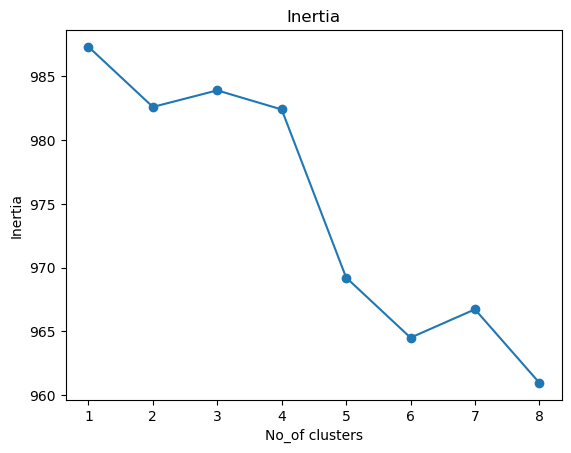

In [70]:
y=[987.305465040223, 982.5897057455562, 983.8883659453788, 982.3894135463253, 969.2167120849136, 964.4995530235904, 966.7232176410284, 960.9651451353798]

x=[i for i in range(1,9)]

import matplotlib.pyplot as plt
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('No_of clusters')
plt.ylabel('Inertia')
plt.title('Inertia')
plt.show()

In [56]:
f3_path="C:\\Users\prana\OneDrive\Desktop\docword.nips.txt"

In [57]:
d=file_convert(f3_path)

In [66]:
l=[]
for k in range(1,10):
    l.append(clustering(d,1000,k))
    print(l)

[987.305465040223]
[987.305465040223, 982.3343856000802]
[987.305465040223, 982.3343856000802, 977.1677011632928]
[987.305465040223, 982.3343856000802, 977.1677011632928, 974.9954371864651]
[987.305465040223, 982.3343856000802, 977.1677011632928, 974.9954371864651, 975.3927930335246]
[987.305465040223, 982.3343856000802, 977.1677011632928, 974.9954371864651, 975.3927930335246, 972.2465891919688]
[987.305465040223, 982.3343856000802, 977.1677011632928, 974.9954371864651, 975.3927930335246, 972.2465891919688, 960.5157985277526]
[987.305465040223, 982.3343856000802, 977.1677011632928, 974.9954371864651, 975.3927930335246, 972.2465891919688, 960.5157985277526, 956.8877344890952]
[987.305465040223, 982.3343856000802, 977.1677011632928, 974.9954371864651, 975.3927930335246, 972.2465891919688, 960.5157985277526, 956.8877344890952, 957.5871036510445]


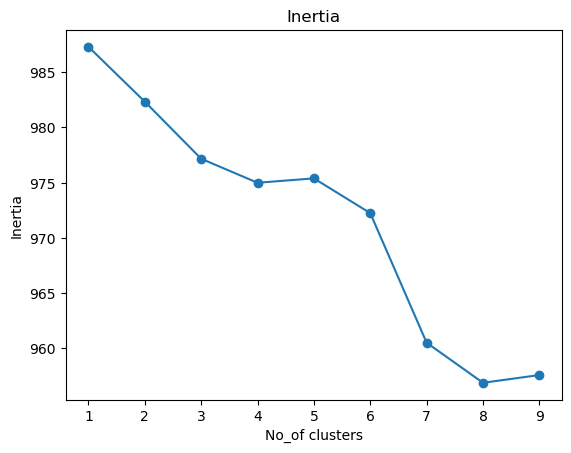

In [71]:
y=[987.305465040223, 982.3343856000802, 977.1677011632928, 974.9954371864651, 975.3927930335246, 972.2465891919688, 960.5157985277526, 956.8877344890952, 957.5871036510445]
x=[i for i in range(1,10)]

import matplotlib.pyplot as plt
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('No_of clusters')
plt.ylabel('Inertia')
plt.title('Inertia')
plt.show()